# Prediction using Supervised ML

## The Spark Foundation (GRIP Jan2021)

## Task 1: Prediction of scores based on number of study hours

### BY: RAJAT VERMA

### Importing all the libraries

In [1]:
#Libraries for Data manipulation, analysis and cleaning
import numpy as np
import pandas as pd

#Libraries for Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data from remote link

In [2]:
path = "http://bit.ly/w-data"
data = pd.read_csv(path)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Structure and Shape of data

In [3]:
print("Information about data")
data.info()

print("Shape of data: " , data.shape)


Information about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
Shape of data:  (25, 2)


### Description of dataset

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the Dataset

Text(0, 0.5, 'Scores')

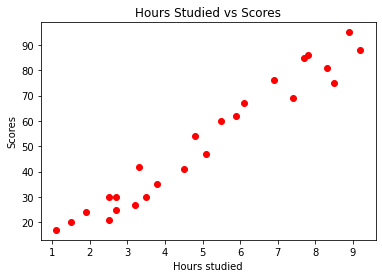

In [5]:
# Setting x and y axis variables
plt.scatter(data['Hours'],data['Scores'],color = 'red')
plt.title('Hours Studied vs Scores')
plt.xlabel("Hours studied")
plt.ylabel("Scores")


We can see from the above graph that there is a positive linear relationship between the number of hours and percentage of score.

### Preparing the data

In [6]:
# Will take all the values except from the last column which is our target variable
X = data.iloc[:, :-1].values

# Will take values from the last column only i.e. from our target variable (dependent variable)
y = data.iloc[:, -1].values

print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
print(X_train)
print(y_train)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [9]:
print(X_test)
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[20 27 69 30 62 35 24 86]


### Training the Simple Linear Regression model on the training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("The coefficient value for study hour variable : ",regressor.coef_)
print("The intercept value : ",regressor.intercept_)


The coefficient value for study hour variable :  [9.78856669]
The intercept value :  2.370815382341881


## Predicting and comparing the predcited values and actual values

In [11]:
y_pred = regressor.predict(X_test)
print()
print()
result = pd.DataFrame({"Predicted values": y_pred, "Actual values" :y_test})
result

,Predicted values,Actual values
0,17.053665,20
1,33.694229,27
2,74.806209,69
3,26.842232,30
4,60.123359,62
5,39.567369,35
6,20.969092,24
7,78.721636,86


Text(0.5, 1.0, 'Training Set')

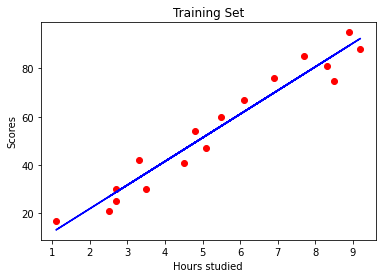

In [12]:
plt.scatter(X_train, y_train, color = 'Red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Training Set")

Text(0.5, 1.0, 'Test Set')

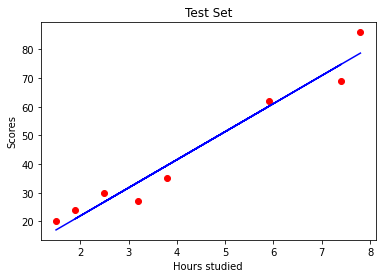

In [13]:
plt.scatter(X_test, y_test, color = 'Red')
plt.plot(X_test,regressor.predict(X_test), color = 'blue')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Test Set")

## Model Evaluation

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print("R-square Value :" ,  round(r2_score(y_test, y_pred),4))
print("Mean Absolute Error :" ,  round(mean_absolute_error(y_test, y_pred),4))
print("Mean Squared Error :" ,  round(mean_squared_error(y_test, y_pred),4))
print("Root Mean Squared Error : " ,  round(np.sqrt(mean_squared_error(y_test, y_pred)),4))


R-square Value : 0.9568
Mean Absolute Error : 4.4197
Mean Squared Error : 22.9651
Root Mean Squared Error :  4.7922


## Prediction

In [16]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Number of hours : ", hours)
print("Predicted Score :" , own_pred)

Number of hours :  9.25
Predicted Score : [92.91505723]
